# BLACK FRIDAY 

### Import Libraries

Let's import required libraries to get started!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading an assessing the data

In [3]:
df=pd.read_excel("BlackFriday.xlsx")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**Columns in the dataset**

User_ID - Id of the user

Product_ID - Id of the product

Gender - Sex of the user(M-male,F-female)

Age - Age of the user

Occupation - Occupation type of user(range->1-20)

City_Category - User residing in which city(range->A-C)

Stay_In_Current_City_Years - Amount of years user has spent in same city

Marital_Status - Marital status of user (0-No,1-Yes)

Product_Category_1 - 

Product_Category_2 -

Product_Category_3 - Product categories

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Inference -> Shape - (537577,12) , 2 float , 5 int and 5 object data types

In [5]:
#df.describe()

The features described in the above data set are:

1. Count tells us the number of NoN-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each features.

6. Max tells us the maximum value of that feature.

## Converting some object data types to int 

In [6]:
df["Gender"].unique() #Function to convert gender data type as int
def gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
df['Gender'] = df['Gender'].apply(gender)

In [7]:
def age(age): ##Function to convert age data type as int
    if age == '0-17':
        return 8
    elif age == '18-25':
        return ((18+25)/2)
    elif age == '26-35':
        return (26+35)/2
    elif age == '36-45':
        return (36+45)/2
    elif age == '46-50':
        return (46+50)/2
    elif age == '51-55':
        return (51+55)/2
    else:
        return 55
df['Age'] = df['Age'].apply(age)

In [8]:
def categories(city_category): #Function to convert city_category data type as int
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
df['City_Category'] = df['City_Category'].apply(categories)

In [9]:
def stay(stay): #Function to convert Stay_In_Current_City_Years data type as int
        if stay == '4+':
            return 4
        else:
            return int(stay)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(stay)

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,8.0,10,2,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,8.0,10,2,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,8.0,10,2,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,8.0,10,2,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55.0,16,0,4,0,8,NaN,NaN,7969


In [11]:
df.isnull().sum(axis=0) #Check for null values on dataset

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

As we can see the null values appear only in Product_category, so we can assign 0 to all these values.

In [12]:
df=df.fillna(0) #Removing null values

In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,8.0,10,2,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,8.0,10,2,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,8.0,10,2,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,8.0,10,2,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55.0,16,0,4,0,8,0.0,0.0,7969


## Exploratory Data Analysis(EDA) 

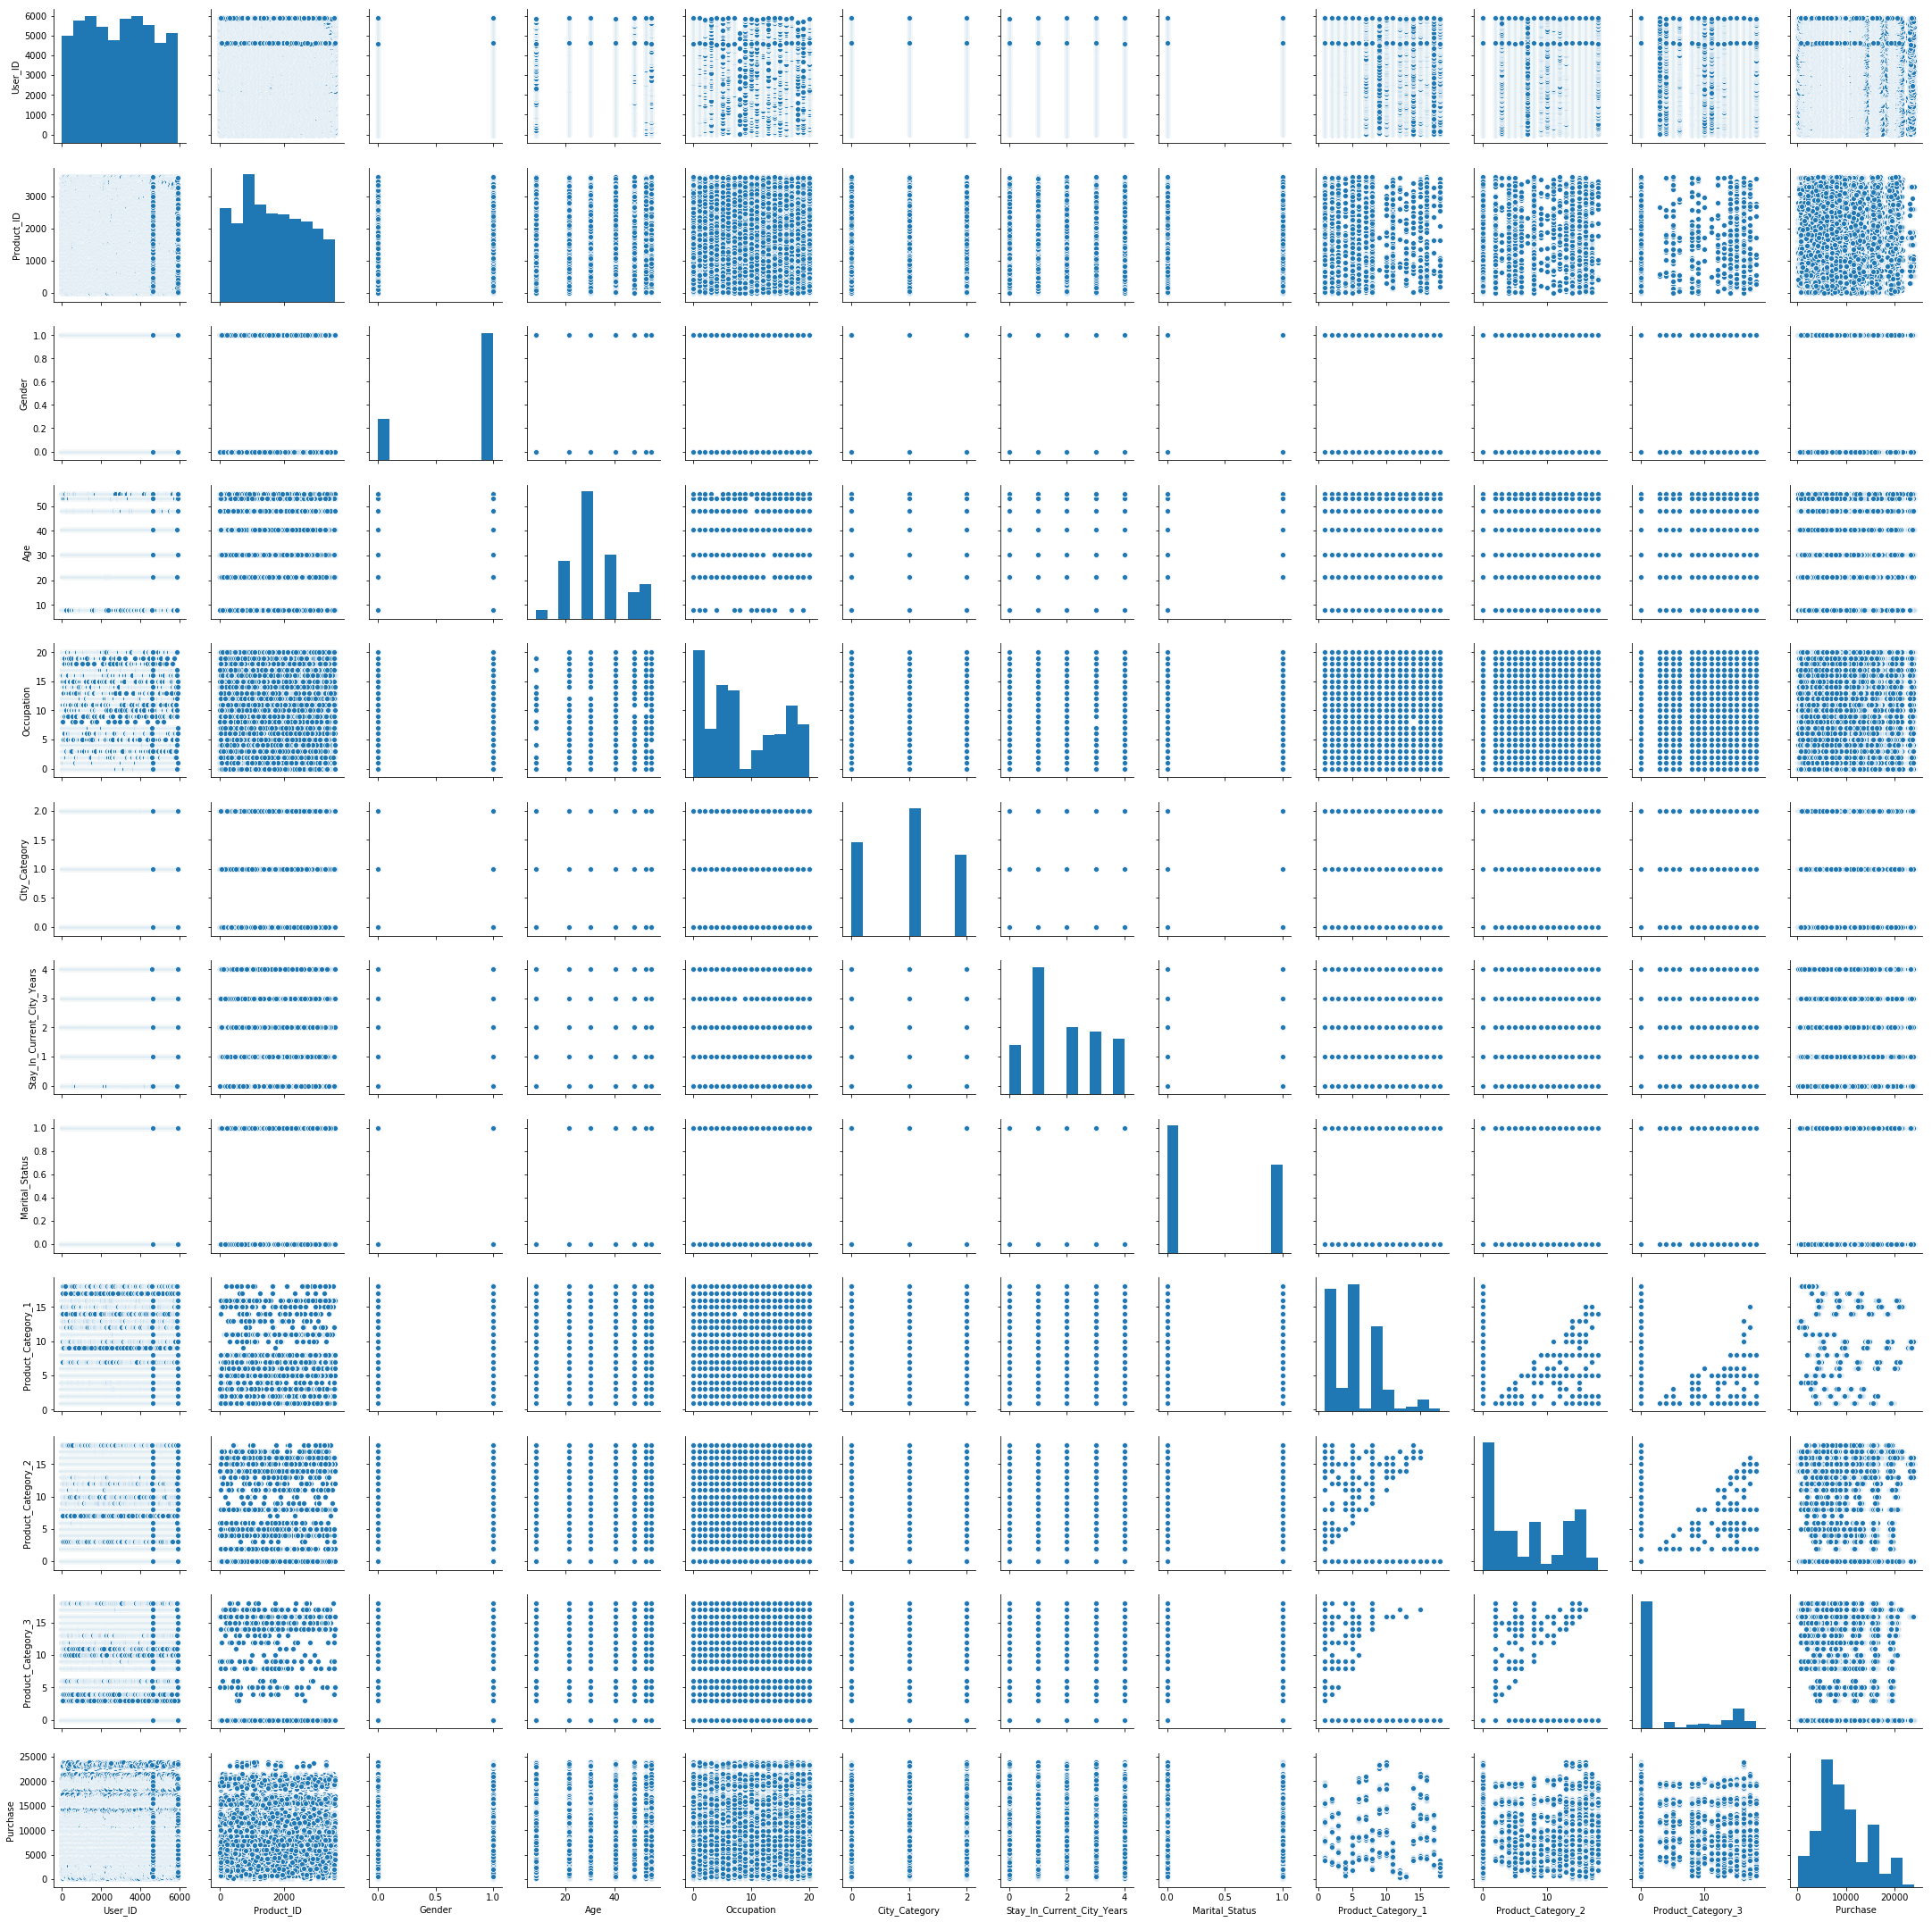

In [96]:
sns.pairplot(df)
plt.show()

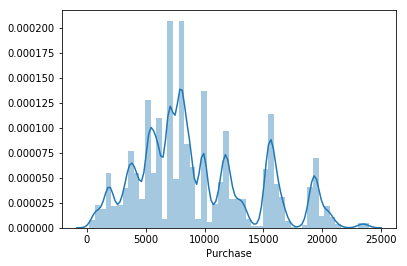

In [15]:
sns.distplot(df['Purchase'])

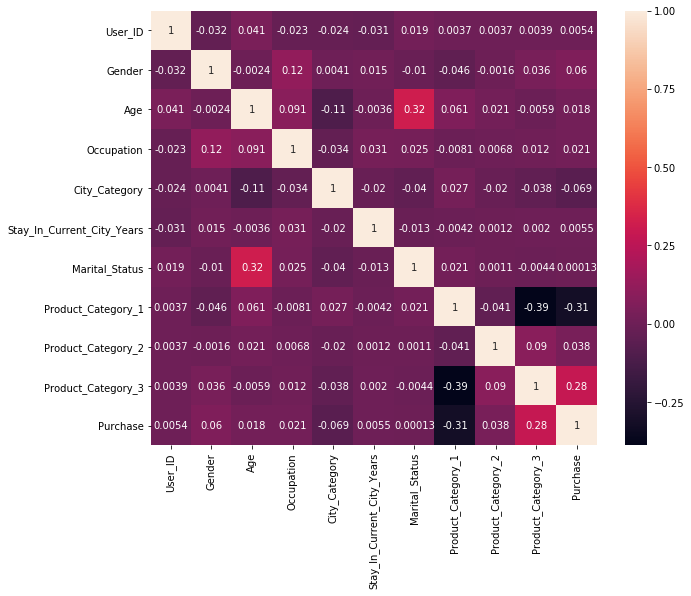

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Here we can see:
1. Product_category_1 has a negative correlation with Purchase
2. Product_category_3 has a positive correlation with Purchase
3. Marital_status has a positive correlation with Age

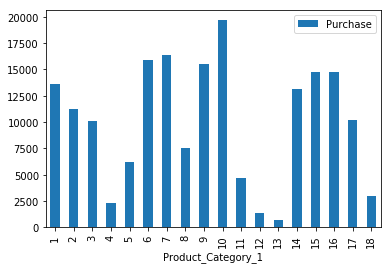

In [17]:
p1=df[["Product_Category_1","Purchase"]].groupby("Product_Category_1",as_index=False).mean()
p1.plot(kind='bar', x='Product_Category_1', y='Purchase')
plt.show()

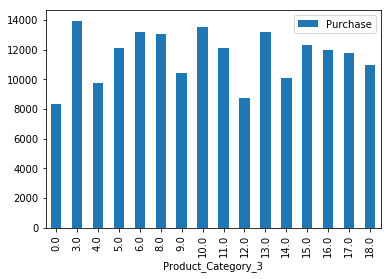

In [18]:
p3=df[["Product_Category_3","Purchase"]].groupby("Product_Category_3",as_index=False).mean()
p3.plot(kind='bar', x='Product_Category_3', y='Purchase')
plt.show()

In [19]:
t_table=df.drop(["Product_Category_1","Product_Category_2","Product_Category_3"],axis=1)
df1=t_table.groupby(["User_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status"],as_index=False).sum()
df1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,0,8.0,10,2,2,0,333481
1,1000002,1,55.0,16,0,4,0,810353
2,1000003,1,30.5,15,2,3,0,341635
3,1000004,1,48.0,7,1,2,1,205987
4,1000005,1,30.5,20,2,1,1,821001


In [24]:
t_table=df.iloc[:,[1,8,9,10]]
df2=t_table.drop_duplicates()
df2.head()

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,3,0.0,0.0
1,P00248942,1,6.0,14.0
2,P00087842,12,0.0,0.0
3,P00085442,12,14.0,0.0
4,P00285442,8,0.0,0.0


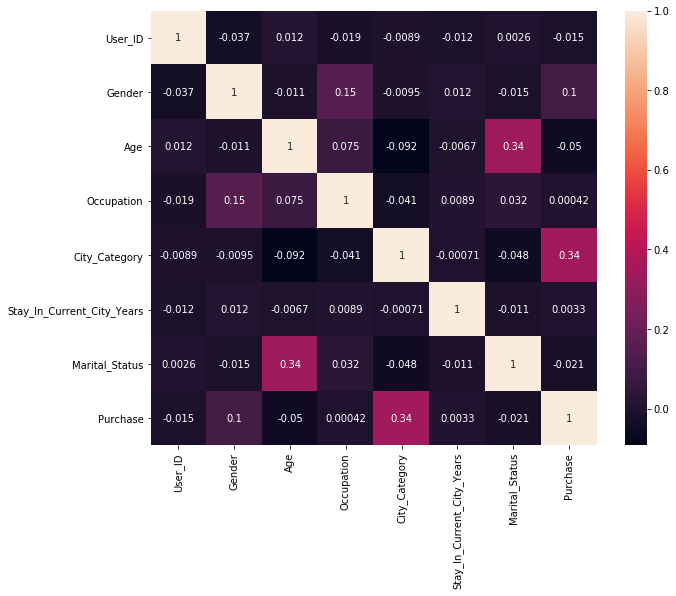

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)

Here we can see:
1. City_Category has a positive correlation with Purchase
2. Gender has a weak positive correlation with occupation
3. Gender has a weak positive correlation with purchase

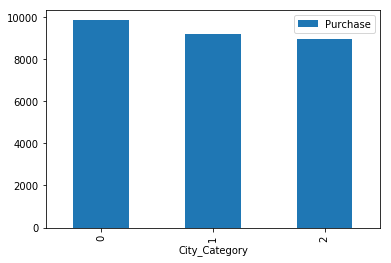

In [29]:
ci=df[["City_Category","Purchase"]].groupby("City_Category",as_index=False).mean()
ci.plot(kind='bar', x='City_Category', y='Purchase')
plt.show()

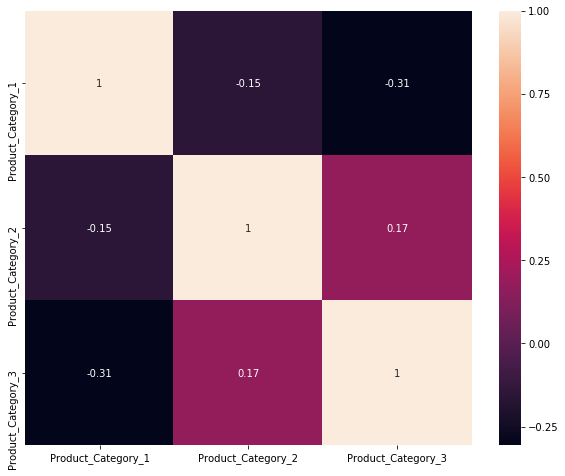

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True)

### Encoding 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 0 to 5890
Data columns (total 8 columns):
User_ID                       5891 non-null int64
Gender                        5891 non-null int64
Age                           5891 non-null float64
Occupation                    5891 non-null int64
City_Category                 5891 non-null int64
Stay_In_Current_City_Years    5891 non-null int64
Marital_Status                5891 non-null int64
Purchase                      5891 non-null int64
dtypes: float64(1), int64(7)
memory usage: 414.2 KB


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
labelproduct = LabelEncoder()

In [93]:
df['User_ID'] = labelproduct.fit_transform(df['User_ID'])
df["Product_ID"]=labelproduct.fit_transform(df['Product_ID'])

In [94]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,670,0,8.0,10,2,2,0,3,0.0,0.0,8370
1,0,2374,0,8.0,10,2,2,0,1,6.0,14.0,15200
2,0,850,0,8.0,10,2,2,0,12,0.0,0.0,1422
3,0,826,0,8.0,10,2,2,0,12,14.0,0.0,1057
4,1,2732,1,55.0,16,0,4,0,8,0.0,0.0,7969


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null int64
Gender                        537577 non-null int64
Age                           537577 non-null float64
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(3), int64(9)
memory usage: 49.2 MB


### Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
scaler.fit(df.drop('Purchase', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
scaled_features = scaler.transform(df.drop('Purchase', axis=1))

In [80]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,-1.744554,-1.019705,-1.751138,-2.406120,0.293877,1.369841,0.108962,-0.831545,-0.612032,-1.092294,-0.617906
1,-1.744554,0.679918,-1.751138,-2.406120,0.293877,1.369841,0.108962,-0.831545,-1.145266,-0.126361,1.616389
2,-1.744554,-0.840167,-1.751138,-2.406120,0.293877,1.369841,0.108962,-0.831545,1.787522,-1.092294,-0.617906
3,-1.744554,-0.864106,-1.751138,-2.406120,0.293877,1.369841,0.108962,-0.831545,1.787522,1.161549,-0.617906
4,-1.743970,1.036998,0.571057,1.905893,1.213543,-1.263032,1.659557,-0.831545,0.721053,-1.092294,-0.617906


### Splitting

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Purchase'], test_size= 0.30 , random_state = 101)

### Fitting the model

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lm = LinearRegression()

In [85]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
print(lm.intercept_)

9335.187451496595


In [87]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

NameError: name 'X' is not defined

### Predictions and Evaluation

In [88]:
predictions = lm.predict(X_test)

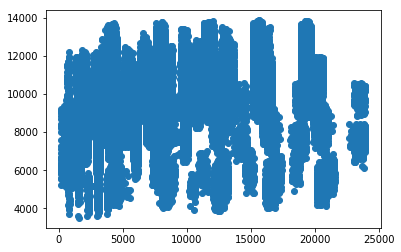

In [89]:
plt.scatter(y_test,predictions)

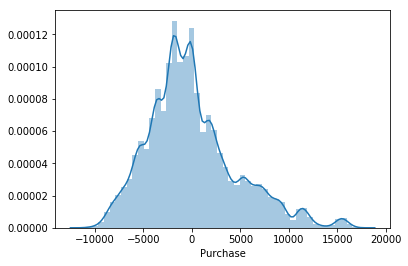

In [90]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [91]:
from sklearn import metrics

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3532.461089215545
MSE: 21294735.44247203
RMSE: 4614.621917608422


## Conclusion

Black Friday dataset has been visualized and analyzed using linear regression model and by taking tyhe predictions we fount that root mean square error comes out to be ~4614 which is a relatively high error score so this model needs more finetuning!!

Thank You!!